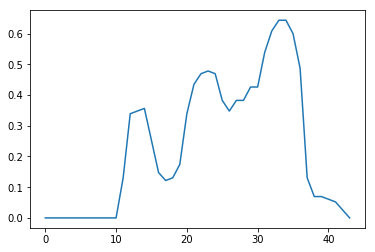

44
[0.35652174 0.47826087 0.64347826]
max= [0.64347826 0.47826087 0.35652174]
33 23 28


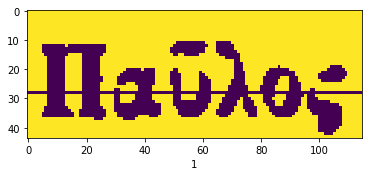

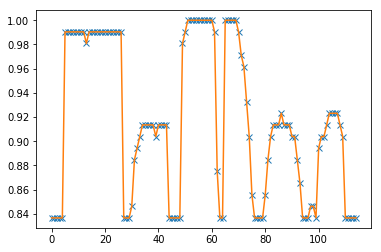

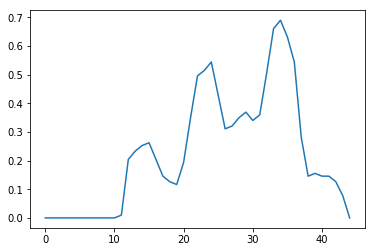

45
[0.26213592 0.54368932 0.36893204 0.68932039 0.15533981]
max= [0.68932039 0.54368932 0.36893204 0.26213592 0.15533981]
34 24 29


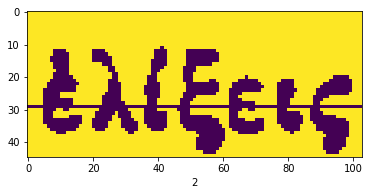

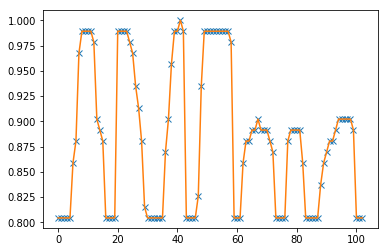

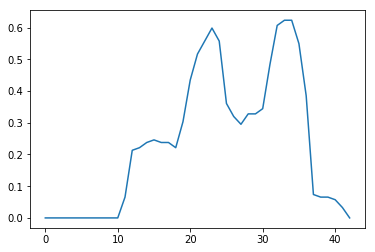

43
[0.24590164 0.59836066 0.62295082]
max= [0.62295082 0.59836066 0.24590164]
33 23 28


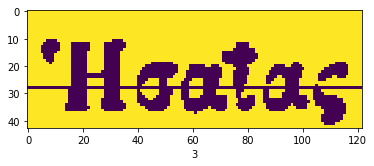

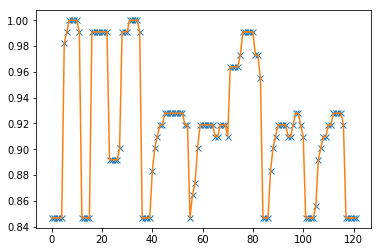

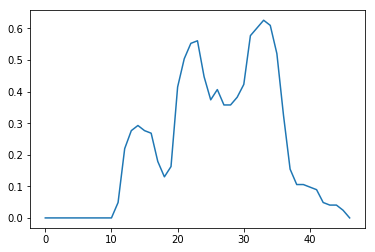

47
[0.29268293 0.56097561 0.40650407 0.62601626]
max= [0.62601626 0.56097561 0.40650407 0.29268293]
33 23 28


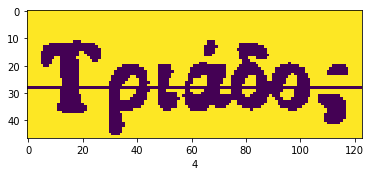

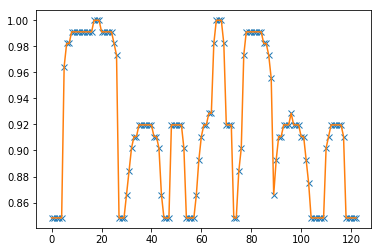

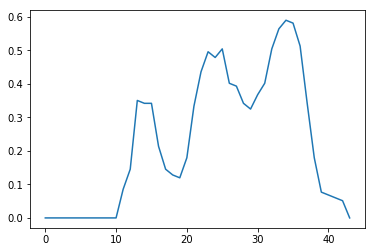

44
[0.35042735 0.4957265  0.5042735  0.58974359]
max= [0.58974359 0.5042735  0.4957265  0.35042735]
34 25 29


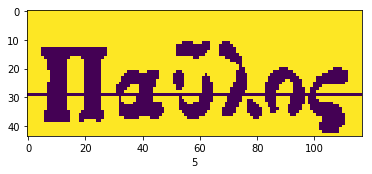

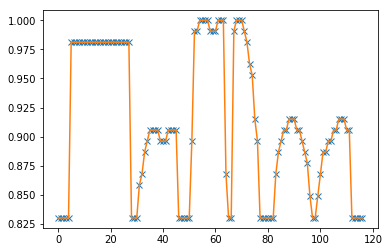

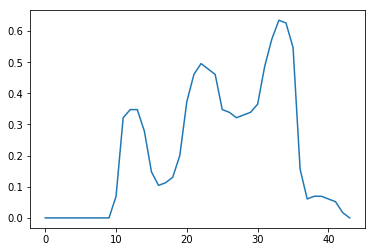

44
[0.34782609 0.49565217 0.63478261 0.06956522]
max= [0.63478261 0.49565217 0.34782609 0.06956522]
33 22 27


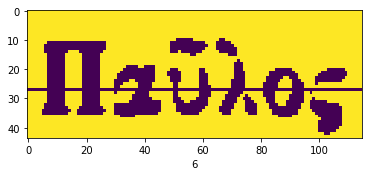

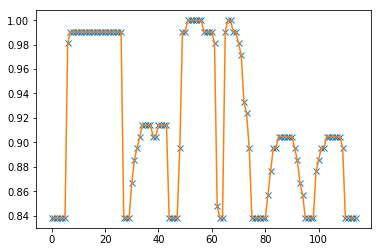

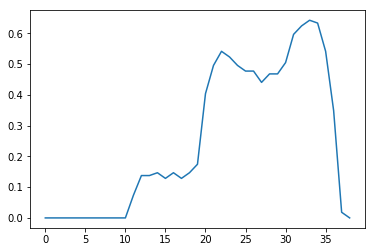

39
[0.14678899 0.14678899 0.5412844  0.64220183]
max= [0.64220183 0.5412844  0.14678899 0.14678899]
33 22 27


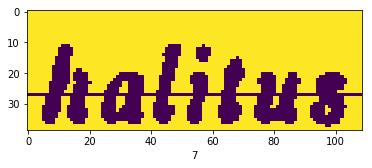

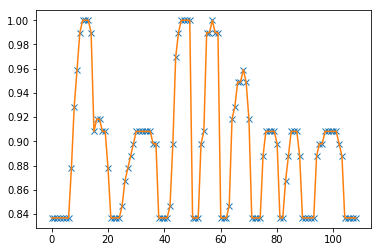

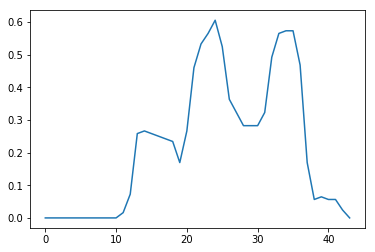

44
[0.26612903 0.60483871 0.57258065 0.06451613]
max= [0.60483871 0.57258065 0.26612903 0.06451613]
24 34 29


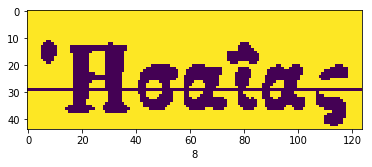

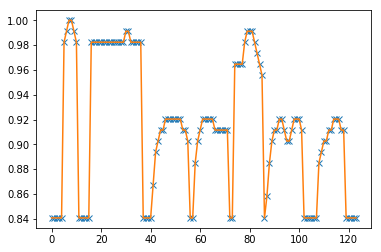

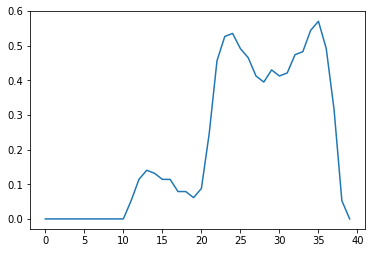

40
[0.14035088 0.53508772 0.42982456 0.57017544]
max= [0.57017544 0.53508772 0.42982456 0.14035088]
35 24 29


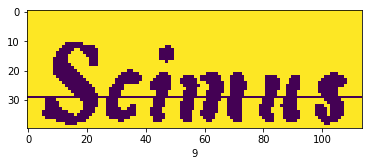

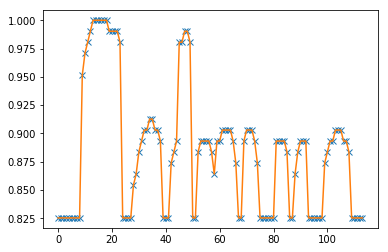

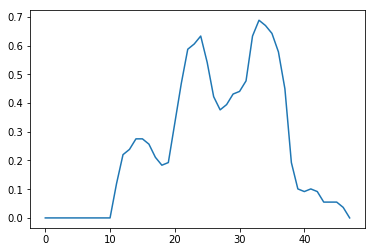

48
[0.27522936 0.63302752 0.68807339 0.10091743]
max= [0.68807339 0.63302752 0.27522936 0.10091743]
33 24 28
10
I= 1
OOOOOO 114 115 115
coef2= (1.0, 0.0)
109


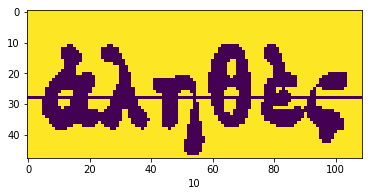

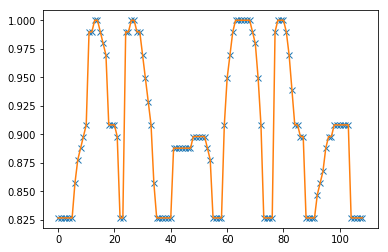

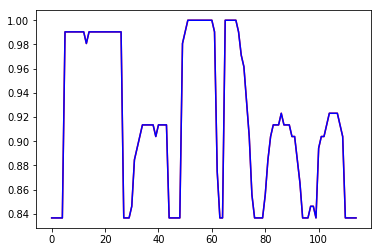

I= 2
OOOOOO 102 115 103
coef2= (0.4439227720196321, 2.9620368921639646e-06)
115


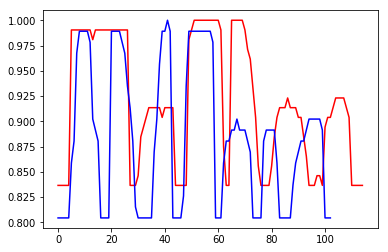

I= 3
OOOOOO 114 115 122
coef2= (0.025570013835507804, 0.7871230031721033)
115


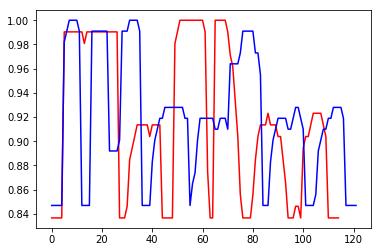

I= 4
OOOOOO 114 115 123
coef2= (0.4232603944216114, 2.7073693165461603e-06)
115


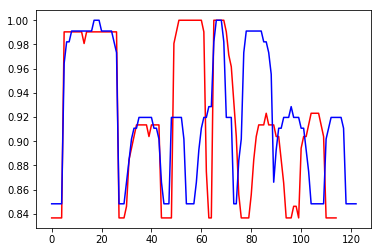

I= 5
OOOOOO 114 115 117
coef2= (0.7321012460863604, 2.1627866960686774e-20)
115


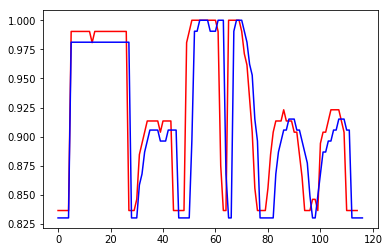

I= 6
OOOOOO 114 115 115
coef2= (0.960060550579004, 8.696560185240677e-64)
115


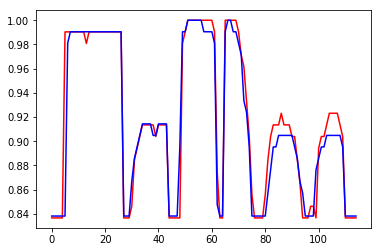

I= 7
OOOOOO 108 115 109
coef2= (0.1360427667054469, 0.16035376786962782)
115


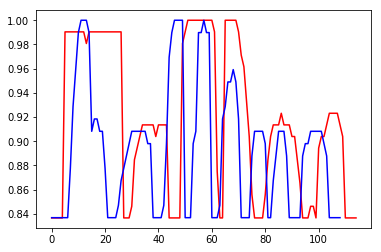

I= 8
OOOOOO 114 115 124
coef2= (0.03463264439102708, 0.7145068040345115)
115


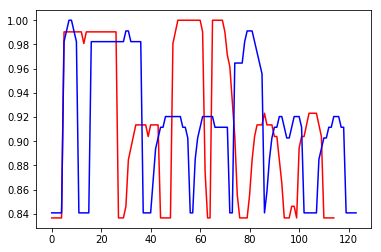

In [31]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from scipy.signal import argrelextrema
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.signal import correlate
from scipy.stats.stats import pearsonr 
from scipy.optimize import linear_sum_assignment
import math 
%run ProfileFunctions.py 

%run PgFunctions.py




def closest_pairs(inp1, inp2, threshold=np.inf):

    cost = np.zeros((inp1.shape[0], inp2.shape[0]), dtype=np.float)   
    for x in range(inp1.shape[0]):
        for y in range(inp2.shape[0]):
            #cost[x][y] = abs(inp1[x] - inp2[y])
            cost[x][y]=math.sqrt((inp1[x]-inp2[y])**2+(x-y)**2) 

    #print(cost)
    col=-1
    sumdiagonal=0
    for row in cost.T:
        col=col+1
        #print(row)

        #print(cost[col,col])
        sumdiagonal=sumdiagonal+cost[col,col]

    translationCoef=sumdiagonal/(col+1)


    #print(sumdiagonal)   
    #print(translationCoef)   
    cost=abs(cost-translationCoef)

    threshold=100000

    row_ind, col_ind = linear_sum_assignment(cost)
    #print(row_ind)
    #print(col_ind)

    out = [item 
            for item in cost[row_ind, col_ind] 
            if item < threshold]

        # if you want the pair of indices filtered by the threshold
    pairs = [(row, col) 
             for row, col in zip(row_ind, col_ind) 
             if cost[row, col] < threshold]

    #print(pairs) 
    t_cost=0
    print(len(pairs))
    for p in pairs:
        ooo=0
        #print(p)
        t_cost=t_cost+cost[p]

    #print('total_cost',t_cost)

    return out, pairs



def closest_pairsXXX(inp1, inp2, threshold=np.inf):
    cost = np.zeros((inp1.shape[0], inp2.shape[0]), dtype=np.float)

    for x in range(inp1.shape[0]):
        for y in range(inp2.shape[0]):
            #cost[x][y] = abs(inp1[x] - inp2[y])
            cost[x][y]=math.sqrt((inp1[x]-inp2[y])**2+ (x-y)**2)
            
    #print('matrix-cost')
    #print(cost)
    # cost for the above example:
    # [[16060 15820 14212 14273 38444]
    # [16121 15881 14151 14212 38383]
    # [17264 17024 13008 13069 37240]
    # [17384 17144 12888 12949 37120]
    # [24569 24329  5703  5764 29935]
    # [55794 55554 25522 25461  1290]
    # [55853 55613 25581 25520  1349]]

    # hungarian algorithm implementation provided by scipy
    row_ind, col_ind = linear_sum_assignment(cost)
    # row_ind = [0 1 3 4 5], col_ind = [1 0 3 2 4] 
    # where (ts1[5] - ts2[4]) = 1290

    # if you want the distances only
    out = [item 
           for item in cost[row_ind, col_ind] 
           if item < threshold]

    # if you want the pair of indices filtered by the threshold
    pairs = [(row, col) 
             for row, col in zip(row_ind, col_ind) 
             if cost[row, col] < threshold]
    
    
    t_cost=0
    for p in pairs:
        #print(p)
        t_cost=t_cost+cost[p]
     
    print('total_cost',t_cost)
        
    return out, pairs








def alignSignals(a_sig,b_sig):

    x_a=len(a_sig)
    x_b=len(b_sig)
    x_max=max(x_a,x_b)
    x=np.arange(0, x_max, 1)
    #print(x_a-x_b)

    if x_a-x_b>0:
        for i in range(x_a-x_b):
            #print(i)
            #b_sig.append(0)
            b_sig=np.append(b_sig,0)
    if x_a-x_b<0:
        
        for i in range(x_b-x_a):
            #print(i)
            a_sig=np.append(a_sig,0)
            #e = np.append(e, e1[0])

    lag = np.argmax(correlate(a_sig, b_sig))
    print('lag=',lag)
    c_sig = np.roll(b_sig, shift=int(np.ceil(lag)+1))

    for i in range(abs(len(c_sig)-lag)):
        #c_sig[i]=0
        z=0
        
        
    return a_sig , c_sig, x







def findUpperProfile(img3):
    mtrx=[]
    for col in img3.T:
        #print(col)
        count=0
        for row in col:
            
            #print(row)
            if row==255:
                count=count+1
                #print(count)
            else: 
                break
                
    
        #print('count=',count)
        mtrx.append(count)
    mtrx=np.asarray(mtrx)
    h=img3.shape[1]
    mtrx=h-mtrx
    mtrx = mtrx/max(mtrx)
    #mtrx = mtrx/max(mtrx)
    return mtrx





















files=['test/0174.pdf300/505-277-77-34.png','test/0174.pdf300/1913-201-80-35.png']
files=['test/0165.pdf300/2679-1527-122-37.png','word/pneuma.png']

files=['test/0192.pdf300/1500-474-132-35.png','word/pneuma.png']
files=['test/0186.pdf300/335-675-134-37.png','word/pneuma.png']

files=['test/0173.pdf300/1287-1550-76-34.png','test/0174.pdf300/1913-201-80-35.png']
files=['word/pantokrator.png','word/pneuma.png']

files=['word/pneuma.png','test/0185.pdf300/1217-1486-120-38.png']

files=['word/pneuma.png','test/0185.pdf300/308-1122-132-35.png']



files=['test/0155.pdf300/528-1612-121-38.png','test/0165.pdf300/1807-1096-119-37.png']

files=['test/0185.pdf300/1217-1486-120-38.png','word/kyrios.png']

files=['test/0172.pdf300/1691-383-75-33.png','test/0173.pdf300/1925-1195-77-35.png']
files=['test/0160.pdf300/850-295-67-37.png','test/0173.pdf300/1925-1195-77-35.png']

files=['test/0181.pdf300/395-1845-84-36.png','test/0173.pdf300/1925-1195-77-35.png']






files = [line.rstrip() for line in open("word/pneuma.png.txt", 'r')]
files = [line.rstrip() for line in open("word/theos.png.txt", 'r')]
files = [line.rstrip() for line in open("word/oti.png.txt", 'r')]
files = [line.rstrip() for line in open("word/paulos.png.txt", 'r')]

interpList=[]
mtrxList=[]
metr=0
for file in files:
    metr=metr+1
    if metr>10:
        continue
    
    
    img = cv2.imread(file,0)

    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
    
    img3,ym=drawMiddleLine(img)
    #img3 = cv2.erode(img3, kernel, iterations=1)
    plt.figure()
    plt.xlabel(metr)
    plt.imshow(img3)
    
    mtrx=findUpperProfile(img3)
    mtrxList.append(mtrx)
    x = np.arange(0, mtrx.shape[0], 1)
    #mtrx = mtrx/max(mtrx)
    
    tck = interpolate.splrep(x, mtrx, s=0)
    #tck = interpolate.UnivariateSpline(x, mtrx, s = 5e1)(x)
    #F   = interpolate.PPoly.from_spline(tck)
    xnew = np.arange(0, mtrx.shape[0], 1)
    ynew = interpolate.splev(xnew, tck, der=0)
    ynew=ynew/max(ynew)
    #from scipy.signal import savgol_filter
    #ynew = savgol_filter(ynew, 15, 3) # window size 51, polynomial order 3
    interpList.append(ynew)
    plt.figure()
    plt.plot(x, mtrx, 'x', xnew, ynew)


print(len(interpList))  
X=mtrxList[0]

for i in range(8):
    print("I=",i+1)
    Y=(mtrxList[i])
    #X,Y,x=alignSignals(mtrxList[0],mtrxList[1]-0.01)
    #coef=pearsonr(X,Y)

    #X,Y,x=alignSignals(interpList[0],interpList[1])
    #coef=pearsonr(interpList[0],interpList[1])

    #print('coef1=',coef)

    mini=min(len(X),len(Y))-1
    #mini=len(X)
    
    print("OOOOOO",mini, len(X),len(Y))
    coef=pearsonr(X[0:mini],Y[0:mini]-0.00)  
    print('coef2=',coef)
    print(len(x))

    plt.figure()
    x = np.arange(0, len(X), 1)
    plt.plot(x, X, 'r-') 
    x2 = np.arange(0, len(Y), 1)
    plt.plot(x2, Y, 'b-') 
    plt.show()
    
    #plt.plot(x[:mini], X[:mini], 'r-', x[:mini]+0, Y[:mini],'b--') 
    #print(X)
    #print(Y)

    #out, pairs = closest_pairs(X,Y)
    #print(pairs)   






















Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 19
Total Keypoints without nonmaxSuppression: 299


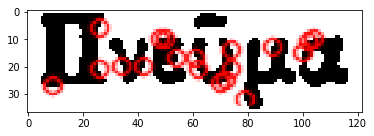

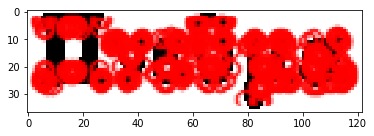

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('word/pneuma.png',0)
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
#cv.imwrite('fast_true.png',img2)
plt.imshow(img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
#cv.imwrite('fast_false.png',img3)
plt.figure()
plt.imshow(img3)

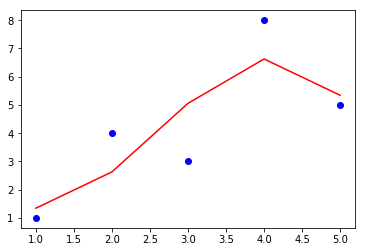

In [18]:
import matplotlib.pyplot as plt
from scipy import interpolate
x = [1,2,3,4,5]
y = [1,4,3,8,5]
yinterp = interpolate.UnivariateSpline(x, y, s = 5e8)(x) 
plt.plot(x, y, 'bo', label = 'Original')
plt.plot(x, yinterp, 'r', label = 'Interpolated')
plt.show()

[1 3]


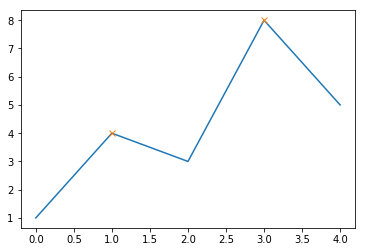

In [15]:
import matplotlib.pyplot as plt
#from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np

y = [1,4,3,8,5]
y=np.asarray(y)
peaks, _ = find_peaks(y, height=0)
print(peaks)
plt.plot(y)
plt.plot(peaks, y[peaks], "x")

plt.show()